In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
img1 = cv.imread('/content/drive/MyDrive/shapes-01.jpg', cv.IMREAD_GRAYSCALE)
assert img1 is not None, 'file could not be read, check with os.path.exists()'
ret, thresh1 = cv.threshold(img1, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img1, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img1, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img1, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img1, 127, 255, cv.THRESH_TOZERO_INV)

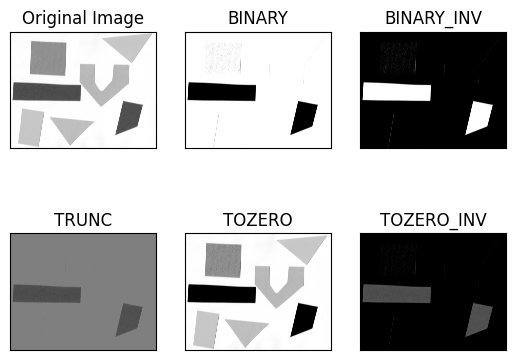

In [4]:
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img1, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', vmin = 0, vmax = 255)
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
img2 = cv.imread('/content/drive/MyDrive/shapes-02.jpg', cv.IMREAD_GRAYSCALE)
assert img2 is not None, 'file could not be read, check with os.path.exists()'
img2 = cv.medianBlur(img2, 5)
ret, th1 = cv.threshold(img2, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img2, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img2, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

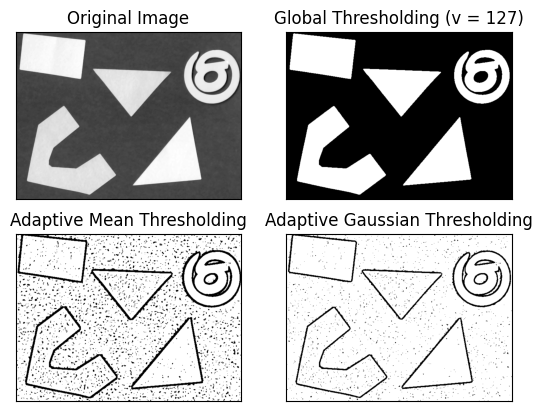

In [6]:
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img2, th1, th2, th3]
for i in range(4):
  plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Band Thresholding')

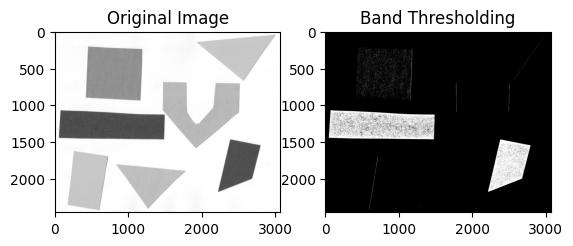

In [7]:
_, bin_img1 = cv.threshold(img1, 70, 255, cv.THRESH_BINARY)
_, bin_img2 = cv.threshold(img1, 130, 255, cv.THRESH_BINARY_INV)
bin_img = cv.bitwise_and(bin_img1, bin_img2)

plt.subplot(1, 2, 1)
plt.imshow(img1, 'gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(bin_img, 'gray')
plt.title('Band Thresholding')

Text(0.5, 1.0, 'Band Thresholding')

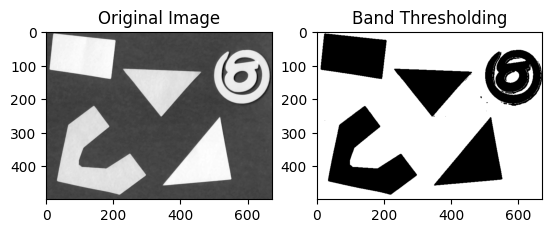

In [8]:
_, bin_img1 = cv.threshold(img2, 70, 255, cv.THRESH_BINARY)
_, bin_img2 = cv.threshold(img2, 130, 255, cv.THRESH_BINARY_INV)
bin_img = cv.bitwise_and(bin_img1, bin_img2)

plt.subplot(1, 2, 1)
plt.imshow(img2, 'gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(bin_img, 'gray')
plt.title('Band Thresholding')

(0.0, 256.0)

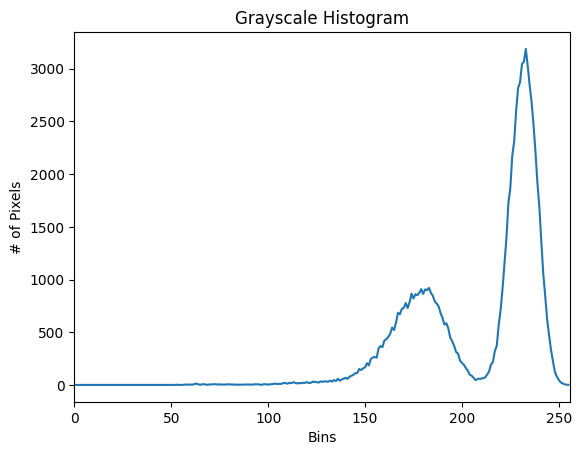

In [9]:
rgb_bmi = cv.cvtColor(cv.imread('/content/drive/MyDrive/bmp.jpg'), cv.COLOR_BGR2RGB)
gray_bmi = cv.imread('/content/drive/MyDrive/bmp.jpg', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([gray_bmi], [0], None, [256], [0, 256])
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

(<Axes: >, <matplotlib.image.AxesImage at 0x7b82dc227dc0>)

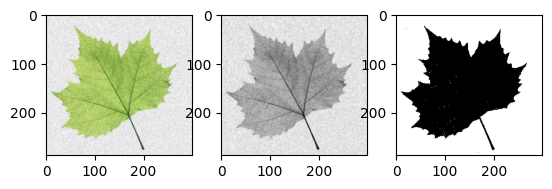

In [10]:
ret, Biomodal = cv.threshold(gray_bmi, 208, 255, cv.THRESH_BINARY)

plt.subplot(1, 3, 1), plt.imshow(rgb_bmi)
plt.subplot(1, 3, 2), plt.imshow(gray_bmi, 'gray')
plt.subplot(1, 3, 3), plt.imshow(Biomodal, 'gray')